# Spambase Dataset: Spam or Not Spam E-mails Using LGBM
Hans Darmawan - JCDS2602

**Please note that the results may differ if the code is executed again. This variability can be caused by random processes such as data splitting and model initialization. Therefore, slight differences in outcomes are to be expected when rerunning the analysis.**

# 1. Business Understanding

Electronic mail (email) is defined as a method of electronic messaging that can occur via direct computer links, local area networks, or wide area networks, typically involving messages sent between specific electronic mailboxes. Email messages are composed, transmitted, and received through a system of mail servers and clients following established protocols such as SMTP and POP3. Unique email addresses are assigned using Internet conventions to ensure proper routing and delivery of messages. Headers are added and modified by various mail servers during the transmission process to track the message’s journey and provide metadata. Email software features and security considerations have been outlined, emphasizing the speed, convenience, and necessary precautions when handling electronic mail (Sennewald & Baillie, 2016).

Email spam, also known as junk email, is defined as unsolicited messages sent in bulk, often by botnets controlled by attackers (Kirvan, Awati, & Teravainen, 2024). It is estimated that about half of the 350 billion daily emails in 2023 were spam, causing significant costs and risks to businesses and individuals. Various techniques such as botnets, snowshoe spam, and image spam are employed to distribute these messages. Spam emails often contain commercial content with financial motives or malicious links designed to steal information or spread malware. Efforts to combat spam include legal regulations, advanced filtering technologies, and user education to identify and report suspicious emails.

Email spamming significantly impacts both users and organizations by causing wasted time, increased bandwidth usage, and potential security risks such as phishing attacks and malware distribution (Almeida, Almeida & Yamakami, 2011). According to Metsis et al. (2006) and Google Developers (2025), a confusion matrix helps evaluate the performance of a spam filter by categorizing outcomes into four types In the context of spam detection, which are:
- A true positive (TP) occurs when a spam email is correctly identified as spam.
- A true negative (TN) is when a legitimate email is correctly classified as not spam. 
- A false positive (FP) happens when a legitimate email is incorrectly marked as spam, causing important messages to be missed. 
- A false negative (FN) is when a spam email is mistakenly classified as legitimate, allowing unwanted content to reach the user’s inbox. 

In the context of email spam filtering, false negatives (FNs) are generally more dangerous than false positives (FPs) because false negatives allow harmful spam—such as phishing or malware emails—to reach the user's inbox, potentially causing significant financial losses, data breaches, and security compromises (Guzella & Caminhas, 2009). False positives, while inconvenient because legitimate emails are wrongly classified as spam, usually result in missed or delayed communication rather than direct harm. 

Financially, the cost of a false negative can be modeled as the expected loss from a successful attack or fraud, and the cost of a false positive is the operational cost of recovering missed legitimate messages. According to IBM (2020), the global average cost of a data breach is 3.86 million USD, with healthcare, energy, financial services, and pharmaceuticals experiencing higher costs due to stricter regulations. Malicious attacks account for 52% of breaches, with the costliest being malicious attacks, averaging 4.27 million USD per incident. Lost business costs are the largest expense, followed by detection, escalation, ex-post response, and notification. The average cost per compromised customer PII record is **$150**, rising to **$175** in malicious attacks. The breach lifecycle averages 280 days, with longer durations causing higher costs. Security automation and incident response preparedness significantly reduce breach costs, with fully deployed automation cutting costs to 2.45 million USD. Remote work due to COVID-19 is expected to increase breach costs and response times. Mega breaches involving over one million records are more expensive, averaging $50 million for 1-10 million records and $392 million for breaches exceeding 50 million records.Therefore, reducing false negatives is critical to minimizing overall risk and financial damage caused by spam emails. Therefore, the business calculation loss can be:

     (number of cases) * 175 USD

Concluded, reducing False Negatives morely to be concerned in this case.

# 2. Data Understanding

## Loading The Libraries and Dataset

In [1]:
# Data manipulation and numerical operations
import pandas as pd  # for data handling and manipulation
import numpy as np   # for numerical operations

# Visualization libraries
import matplotlib.pyplot as plt  # for plotting graphs and charts
import seaborn as sns            # for statistical data visualization
from wordcloud import WordCloud  # for generating word cloud visualizations

# Machine learning and model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV  # for data splitting, cross-validation, and hyperparameter tuning
from sklearn.pipeline import Pipeline  # for creating machine learning pipelines
from sklearn.preprocessing import RobustScaler  # for feature scaling robust to outliers
from sklearn.metrics import confusion_matrix, recall_score  # for model evaluation metrics

# Classifiers
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier  # ensemble classifiers
from xgboost import XGBClassifier  # XGBoost classifier
from lightgbm import LGBMClassifier  # LightGBM classifier

# Model interpretation
import shap  # for SHAP values to explain model predictions

# System and warnings management
import os       # for environment variable management
import warnings  # to control warning messages

# Model saving and loading
import joblib  # for saving and loading trained models

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:.3f}'.format)

# Set environment variable to suppress joblib/loky warnings related to CPU count on Windows
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # Adjust this number according to your number of cores/logical CPUs

# Suppress general UserWarnings and specific LightGBM warnings about invalid feature names
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", message="X does not have valid feature names")

The code imports essential libraries for data manipulation and numerical operations, enabling effective handling and processing of datasets. Visualization tools are included to facilitate the creation of various plots and graphical representations for data analysis. Machine learning functionalities are provided through modules for data splitting, model training, evaluation, and hyperparameter tuning. Several classification algorithms are incorporated to build predictive models, while model interpretation is supported by specialized libraries for explaining predictions. Additionally, system settings and warnings are managed, and trained models are saved or loaded using dedicated utilities.

In [2]:
real_df = pd.read_csv('spambase.csv')
df = real_df.copy()
print(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.000,0.640,0.640,0.000,0.320,0.000,0.000,0.000,0.000,0.000,0.000,0.640,0.000,0.000,0.000,0.320,0.000,1.290,1.930,0.000,0.960,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.778,0.000,0.000,3.756,61,278,1
1,0.210,0.280,0.500,0.000,0.140,0.280,0.210,0.070,0.000,0.940,0.210,0.790,0.650,0.210,0.140,0.140,0.070,0.280,3.470,0.000,1.590,0.000,0.430,0.430,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.070,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.132,0.000,0.372,0.180,0.048,5.114,101,1028,1
2,0.060,0.000,0.710,0.000,1.230,0.190,0.190,0.120,0.640,0.250,0.380,0.450,0.120,0.000,1.750,0.060,0.060,1.030,1.360,0.320,0.510,0.000,1.160,0.060,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.060,0.000,0.000,0.120,0.000,0.060,0.060,0.000,0.000,0.010,0.143,0.000,0.276,0.184,0.010,9.821,485,2259,1
3,0.000,0.000,0.000,0.000,0.630,0.000,0.310,0.630,0.310,0.630,0.310,0.310,0.310,0.000,0.000,0.310,0.000,0.000,3.180,0.000,0.310,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.137,0.000,0.137,0.000,0.000,3.537,40,191,1
4,0.000,0.000,0.000,0.000,0.630,0.000,0.310,0.630,0.310,0.630,0.310,0.310,0.310,0.000,0.000,0.310,0.000,0.000,3.180,0.000,0.310,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.135,0.000,0.135,0.000,0.000,3.537,40,191,1


The Spambase dataset, created in 1999 and last updated in 2023, is used for classifying emails as spam or non-spam. It contains 4,601 instances with 57 features, including word and character frequencies and statistics on capital letter sequences. The dataset aims to help build filters that accurately distinguish spam, minimizing false positives, which are particularly undesirable. Typical classification error rates are around 7%. The dataset was developed by Hopkins, Reeber, Forman, and Suermondt and is publicly available through the UCI Machine Learning Repository (Hopkins et al., 1999).

## Spambase Dataset Summary (DataFrame Info)

- **Number of instances (rows):** 4601  
- **Number of columns (features + target):** 58  

### Columns and Data Types
- 55 columns are of type `float64` representing continuous numerical features.
- 3 columns are of type `int64`, including:
  - `capital_run_length_longest`
  - `capital_run_length_total`
  - `Class` (target variable)

### Class Label Description

- **Class 0:** Non-spam email (legitimate email)
- **Class 1:** Spam email (unsolicited commercial email)


### Feature Description
- Columns 0 to 47 (`word_freq_*` and `char_freq_*`) represent the frequency of specific words or characters in an email, expressed as percentages (float values).
- Columns 48 to 53 (`char_freq_;`, `char_freq_(`, etc.) are character frequency features.
- Columns 54 to 56 represent statistics related to sequences of capital letters:
  - `capital_run_length_average` (float): average length of uninterrupted capital letter sequences.
  - `capital_run_length_longest` (int): length of the longest uninterrupted capital letter sequence.
  - `capital_run_length_total` (int): total number of capital letters in the email.
- Column 57 (`Class`) is the target variable indicating whether an email is spam (1) or not (0).

## Missing Values Checking

In [3]:
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

Confirmed that there are no missing values in this dataset, which means all columns have 4601 non-null entries.

## Duplicates Checking

In [4]:
df.duplicated().sum()

391

This dataset contains 391 duplicate entries. These duplicates represent repeated rows that are identical across all features and the target. It may be beneficial to remove or handle these duplicates before training models to avoid bias or overfitting, but it will be considered later.

## Proportion Analysis

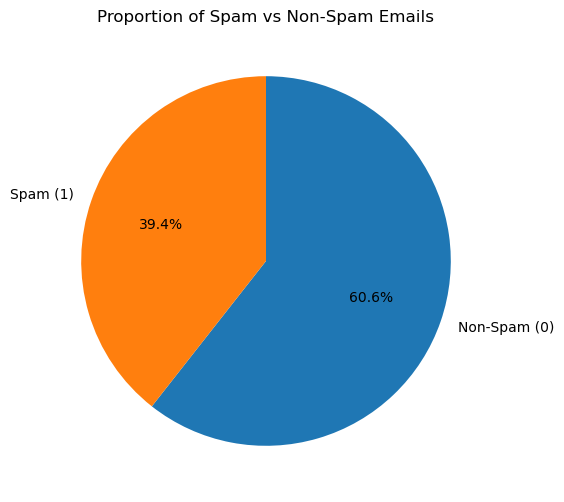

In [5]:
# Calculate class proportions
class_counts = df['Class'].value_counts()
class_labels = ['Non-Spam (0)', 'Spam (1)']

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Proportion of Spam vs Non-Spam Emails')
plt.show()

The dataset has approximately 60.6% non-spam emails (majority class) and 39.4% spam emails (minority class). This distribution is relatively **close to balanced**. A dataset is often considered imbalanced when one class significantly outnumbers the other, commonly when the minority class represents less than 20-30% of the data (He & Garcia, 2009; Johnson & Khoshgoftaar, 2019). Without removing the duplicates, such a distribution allows standard classification algorithms to perform well without requiring extensive imbalance-handling techniques.

## Frequency Analysis

In [6]:
# Generate list of word frequency columns using list comprehension
word_freq_cols = [col for col in df.columns if col.startswith('word_freq_')]

def create_wordcloud(data, title):
    # Convert word frequencies to a dictionary suitable for WordCloud
    word_freq_dict = {col.replace('word_freq_', ''): data[col].mean() for col in word_freq_cols}
    
    # Generate wordcloud
    wc = WordCloud(width=800, height=400).generate_from_frequencies(word_freq_dict)
    
    # Plot
    plt.figure(figsize=(14, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

def plot_word_freq_distribution(data, title):
    # Calculate mean frequencies for each word feature
    mean_freq = data[word_freq_cols].mean().sort_values(ascending=False)
    
    # Plot distribution as barplot without palette to avoid warning
    plt.figure(figsize=(14, 6))
    sns.barplot(x=mean_freq.index.str.replace('word_freq_', ''), y=mean_freq.values)
    plt.xticks(rotation=90)
    plt.xlabel('Words')
    plt.ylabel('Average Frequency (%)')
    plt.title(title)
    plt.tight_layout()
    plt.show()


This code analyzes word frequencies in email data by first identifying all columns related to word counts. It then creates two types of visualizations: a word cloud and a bar chart. The word cloud displays words sized according to their average frequency in a selected group of emails (e.g., spam or non-spam), making it easy to see which words are most common. The bar chart presents the same information as sorted bars, allowing precise comparison of average word frequencies across the dataset. Together, these visualizations help highlight key words that differentiate spam from non-spam emails.

Using the average (mean) to analyze word and character frequencies in email classification tasks provides a clear and effective measure of central tendency, especially in large datasets like Spambase. The mean captures the typical frequency of features across instances, facilitating straightforward comparison between classes such as spam and non-spam. While alternatives like the median or mode are useful in skewed or heavily zero-inflated data, they often yield less informative results in this context, as many word frequencies tend to be zero. Thus, the mean offers a more stable and interpretable summary for distinguishing feature importance during exploratory data analysis and visualization (Kuhn & Johnson, 2019; James et al., 2013).

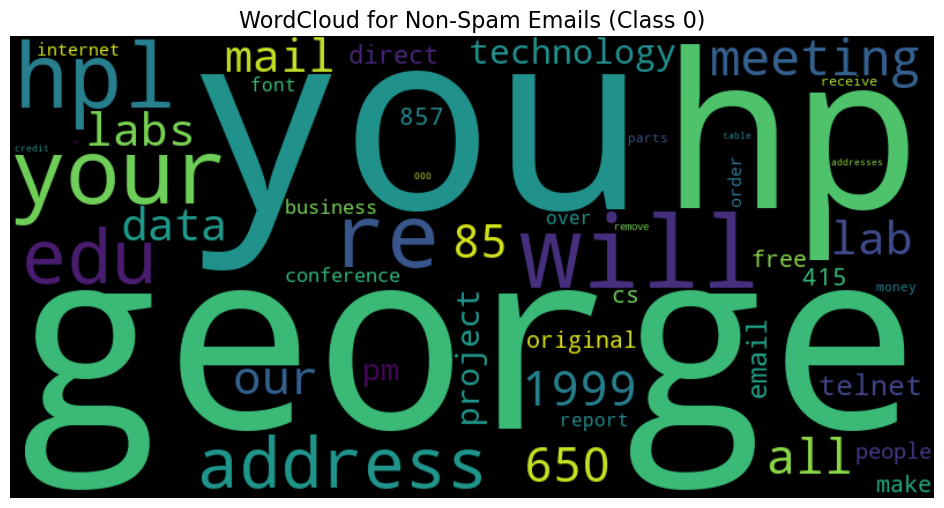

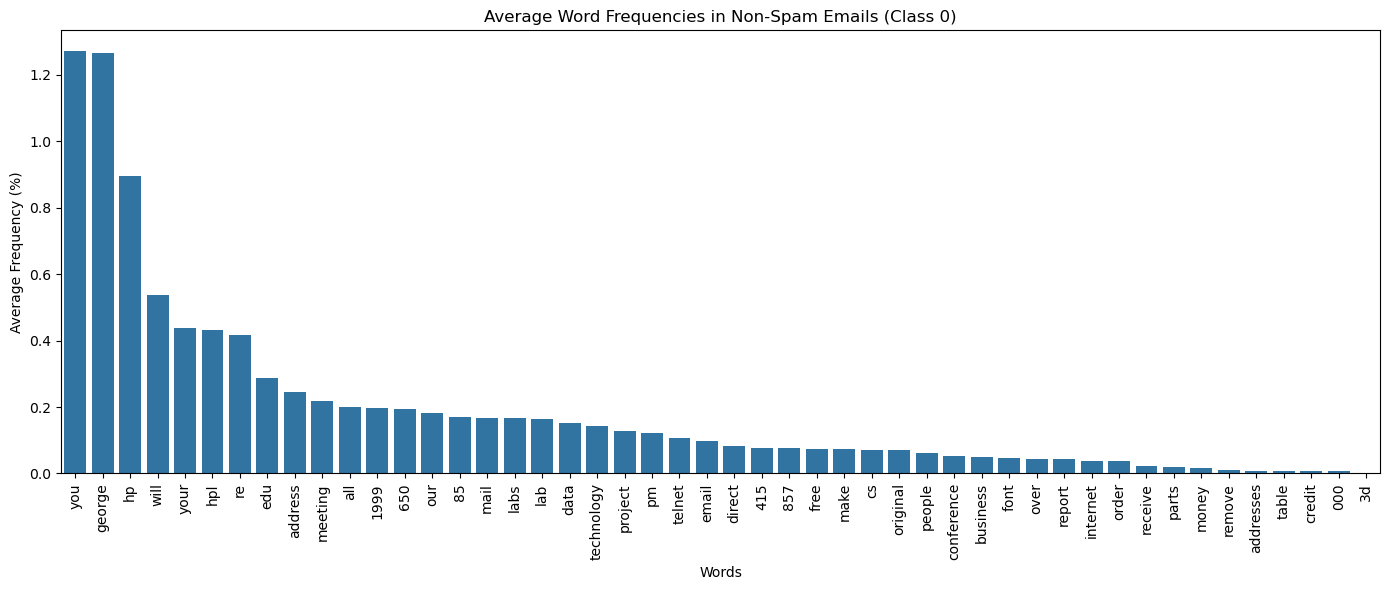

In [7]:
# Create wordcloud for Non-Spam emails (Class 0)
create_wordcloud(df[df['Class'] == 0], "WordCloud for Non-Spam Emails (Class 0)")

# Plot distribution for Non-Spam emails (Class 0)
plot_word_freq_distribution(df[df['Class'] == 0], "Average Word Frequencies in Non-Spam Emails (Class 0)")

The word cloud highlights the most frequently occurring words in non-spam emails by displaying them in sizes proportional to their average frequency. Prominent words such as "you," "george," "hp," "will," and "your" suggest common, personalized, or context-specific terms typical in legitimate communications. For example, "george" and "650" are known indicators of non-spam emails in this dataset, possibly related to specific senders or local identifiers.

The bar chart quantifies these observations by showing the average frequency percentages of the top words. Words like "you" and "george" appear with the highest average frequency (~1.2%), followed by others such as "hp," "will," and "your" with slightly lower but still significant frequencies. This detailed frequency distribution confirms that non-spam emails tend to use more personalized and context-related vocabulary, reflecting typical conversational or business-related content.

Together, these visualizations suggest that non-spam emails are characterized by words indicating personal communication, organizational references, and specific identifiers, which can help distinguish them from spam emails during classification.

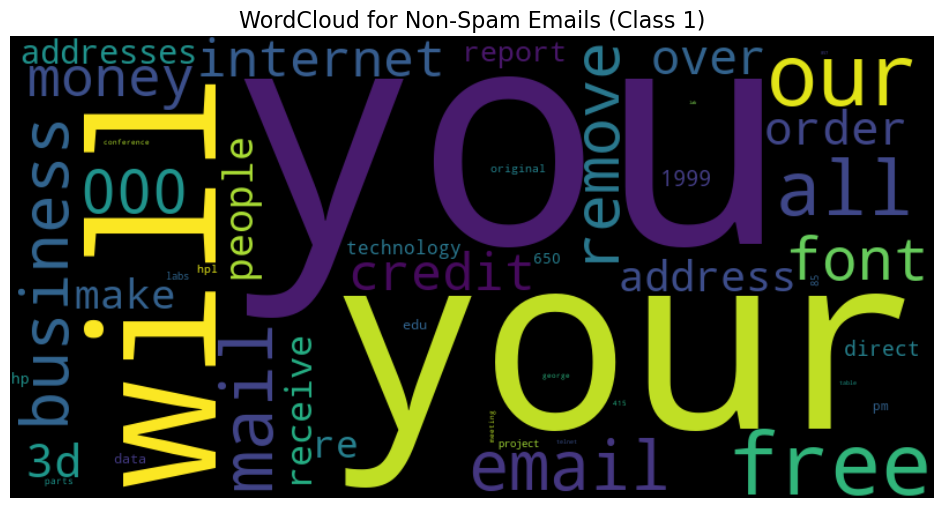

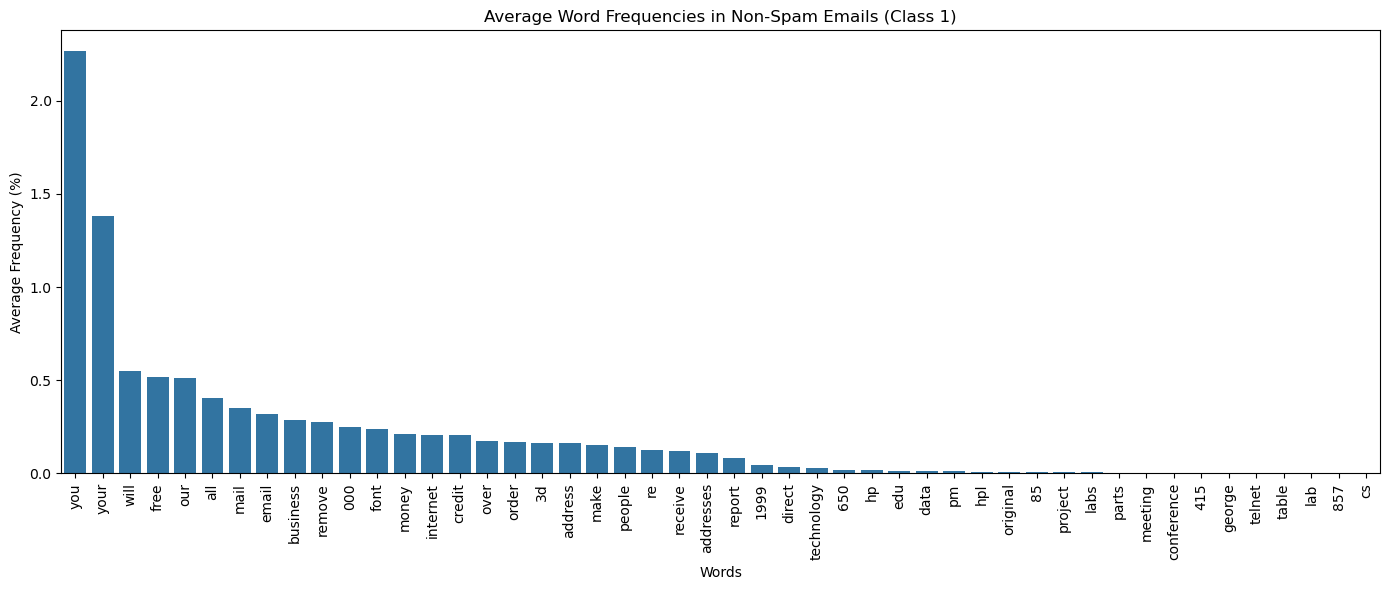

In [8]:
# Create wordcloud for Non-Spam emails (Class 1)
create_wordcloud(df[df['Class'] == 1], "WordCloud for Non-Spam Emails (Class 1)")

# Plot distribution for Non-Spam emails (Class 1)
plot_word_freq_distribution(df[df['Class'] == 1], "Average Word Frequencies in Non-Spam Emails (Class 1)")

The word cloud for spam emails highlights frequently occurring words that are typical in unsolicited commercial messages. Prominent words such as "you," "your," "free," "business," "remove," "credit," "money," and "order" reflect common themes in spam, including promotions, offers, and calls to action. Words like "email," "addresses," and "internet" also suggest the digital nature of these messages. The presence of words like "000" and "font" may relate to formatting tricks often used in spam.

The bar chart quantifies these findings by showing the average frequency of these words in spam emails. Words like "you" and "your" appear most frequently (over 2% and about 1.4%, respectively), followed by "will," "free," and "our." This distribution supports the idea that spam emails often use persuasive language focused on the recipient and promotional content.

Together, these visualizations illustrate that spam emails tend to use words related to marketing, urgency, and financial incentives, which helps differentiate them from non-spam emails during classification.

In [9]:
# List of character frequency columns
char_freq_cols = [col for col in df.columns if col.startswith('char_freq_')]

def plot_char_freq_distribution(data, title):
    # Calculate mean frequencies for each character feature
    mean_freq = data[char_freq_cols].mean().sort_values(ascending=False)
    
    # Plot distribution as barplot without palette to avoid warning
    plt.figure(figsize=(10, 6))
    sns.barplot(x=mean_freq.index.str.replace('char_freq_', ''), y=mean_freq.values)
    plt.xticks(rotation=0)
    plt.xlabel('Characters')
    plt.ylabel('Average Frequency (%)')
    plt.title(title)
    plt.tight_layout()
    plt.show()

This code focuses on analyzing character frequencies in email data by first selecting all columns related to character counts. It calculates the average frequency of each character feature within a chosen subset of emails (such as spam or non-spam) and visualizes these averages using a bar chart. The chart displays characters on the x-axis and their mean frequencies on the y-axis, allowing clear comparison of how often different characters appear across email classes. This approach helps identify distinctive character usage patterns that may differentiate spam from non-spam emails. Using the average frequency as a measure provides a reliable and interpretable summary of typical character occurrence, which is especially useful in large datasets like Spambase. While other statistics like the median can be informative in skewed data, the mean generally offers a clearer comparison for exploratory analysis and visualization purposes (Kuhn & Johnson, 2019; James et al., 2013).

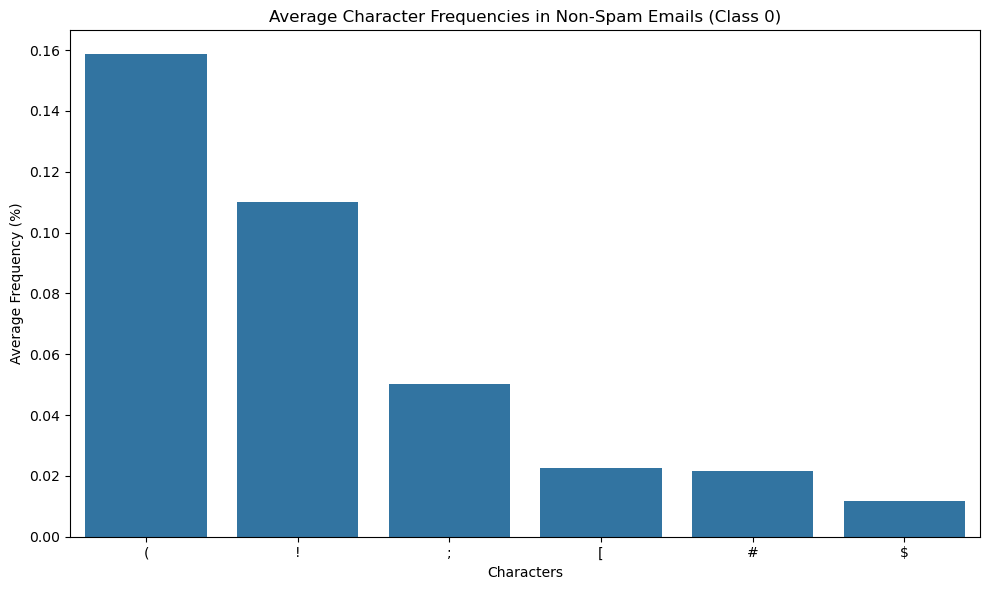

In [10]:
# Plot distribution for Non-Spam emails (Class 0)
plot_char_freq_distribution(df[df['Class'] == 0], "Average Character Frequencies in Non-Spam Emails (Class 0)")

The bar chart shows that non-spam emails most frequently contain the character `(` followed by `!` and `;`. These characters are commonly used in normal text for parentheses, exclamations, and semicolons, reflecting typical sentence structures or formatting in legitimate emails. Characters like `[` and `#` appear less frequently but still contribute to the overall text style. The relatively balanced distribution of these characters suggests standard punctuation usage in non-spam emails.

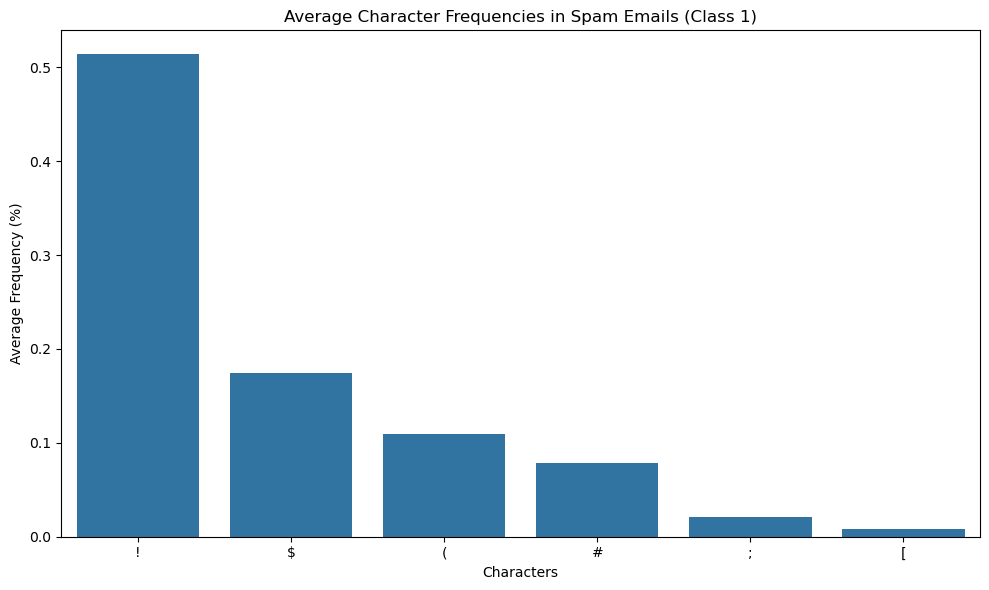

In [11]:
# Plot distribution for Spam emails (Class 1)
plot_char_freq_distribution(df[df['Class'] == 1], "Average Character Frequencies in Spam Emails (Class 1)")

In spam emails, the character `!` is by far the most frequent, followed by `$` and `(`. This pattern aligns with the persuasive and attention-grabbing nature of spam messages, where exclamation marks are used to create urgency or excitement, and dollar signs are common in financial or promotional content. The character `#` appears moderately, while `;` and `[` are less frequent. The higher frequency of `!` and `$` highlights typical spam tactics aimed at enticing recipients.

## Normality Analysis

In [12]:
df2 = df.copy()

# Sum all word frequency columns into a new column 'word_freqs'
def group_word_freq(df2):
    df2['word_freqs'] = df2[[col for col in df2.columns if col.startswith('word_freq_')]].sum(axis=1)

group_word_freq(df2)

# Sum all character frequency columns into a new column 'char_freqs'
def group_char_freq(df2):
    df2['char_freqs'] = df2[[col for col in df2.columns if col.startswith('char_freq_')]].sum(axis=1)

group_char_freq(df2)

# List of columns to plot (excluding 'Class' if you want)
columns_to_plot = ['word_freqs', 'char_freqs', 
                   'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total']
df2 = df2[columns_to_plot + ['Class']]
df2.head()

,word_freqs,char_freqs,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,6.740,0.778,3.756,61,278,1
1,11.110,0.732,5.114,101,1028,1
2,10.950,0.623,9.821,485,2259,1
3,7.240,0.274,3.537,40,191,1
4,7.240,0.270,3.537,40,191,1


The code creates a copy of the original dataset and adds two new columns: wordfreqs and charfreqs. These columns represent the total frequency of all word-related and character-related features, respectively, by summing the values of all columns that start with "wordfreq" and "charfreq" for each email. This aggregation simplifies the dataset by consolidating multiple related features into summary metrics, which can be useful for this EDA.

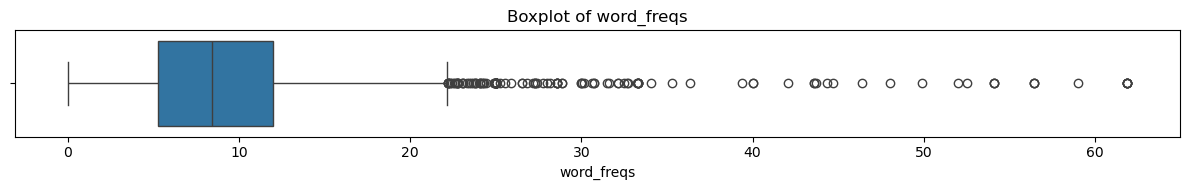

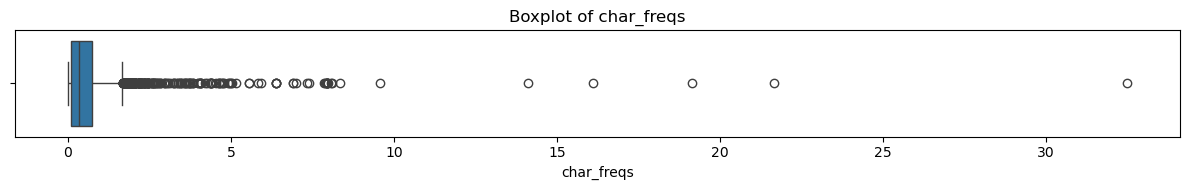

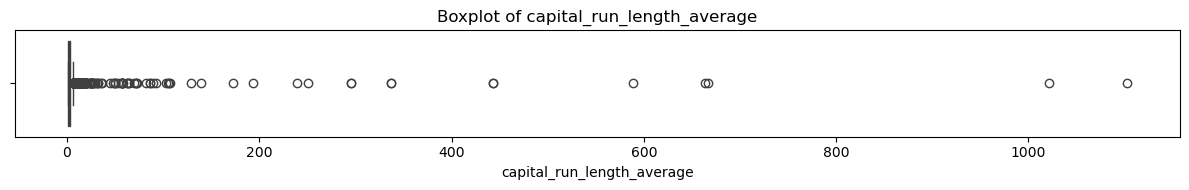

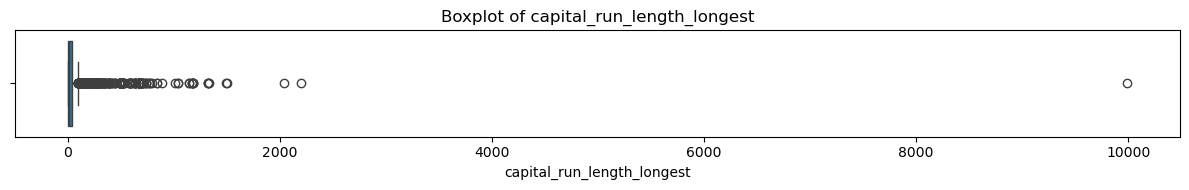

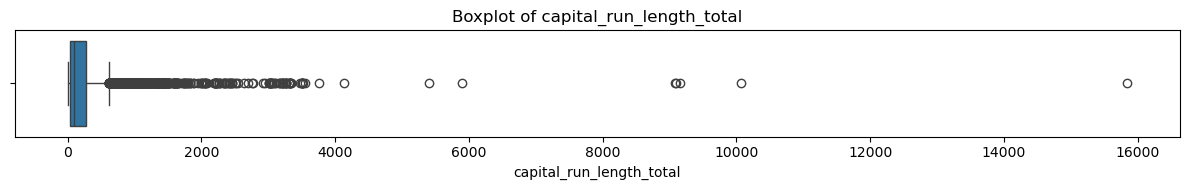

In [13]:
# Create boxplots for each column in a loop
for col in columns_to_plot:
    plt.figure(figsize=(12, 2))
    sns.boxplot(x=df2[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


The boxplots for the features wordfreqs, charfreqs, and the three capital run length metrics reveal significant skewness and the presence of numerous outliers. Most values cluster near the lower end of the scale, indicating that for the majority of emails, word and character frequencies, as well as capital letter sequences, are relatively low. However, the long tails and outliers—especially pronounced in the capital run length features—suggest that some emails contain exceptionally high values, likely corresponding to spam messages that use excessive capitalization and unusual character patterns. This distributional pattern highlights the importance of these features in distinguishing spam from non-spam emails and suggests that appropriate data preprocessing or robust modeling techniques may be necessary to handle such variability and outliers effectively.

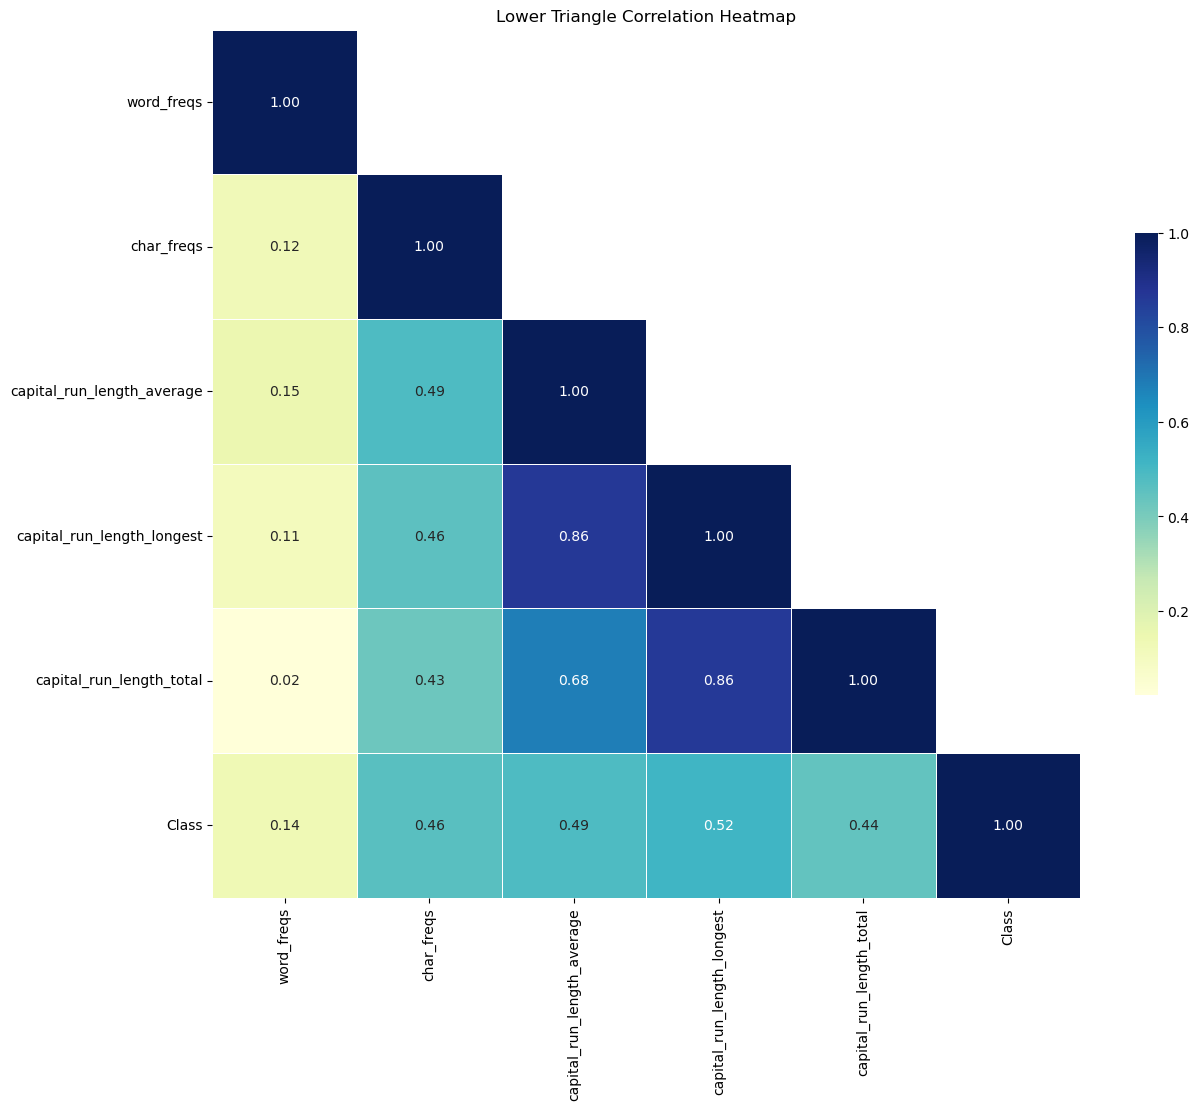

In [14]:
# Calculate correlation matrix (numeric columns only)
corr_matrix = df2.corr(numeric_only=True, method='spearman')

# Create a mask for the lower triangle
mask = np.tril(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=~mask, annot=True, fmt=".2f", cmap='YlGnBu',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Lower Triangle Correlation Heatmap')
plt.show()


The Spearman correlation heatmap reveals meaningful relationships among the features in the dataset. Notably, the capital run length features show strong positive correlations with each other (ranging from 0.43 to 0.86), reflecting their related measurement of consecutive capital letters in emails. The moderate positive correlations between these capital run length features and the target class (0.44 to 0.52) suggest that emails with longer sequences of capital letters are more likely to be spam. Character frequencies also exhibit a moderate positive correlation with the class (0.46), while total word frequencies have a weaker association (0.14). Spearman’s rank correlation coefficient, a nonparametric measure of monotonic association, is appropriate here due to its robustness to non-normality and outliers common in text data (Hauke & Kossowski, 2011). These findings indicate that features related to capitalization and character usage are more predictive of spam than overall word frequency, aligning with domain knowledge that spam often employs excessive capitalization and special characters to attract attention.

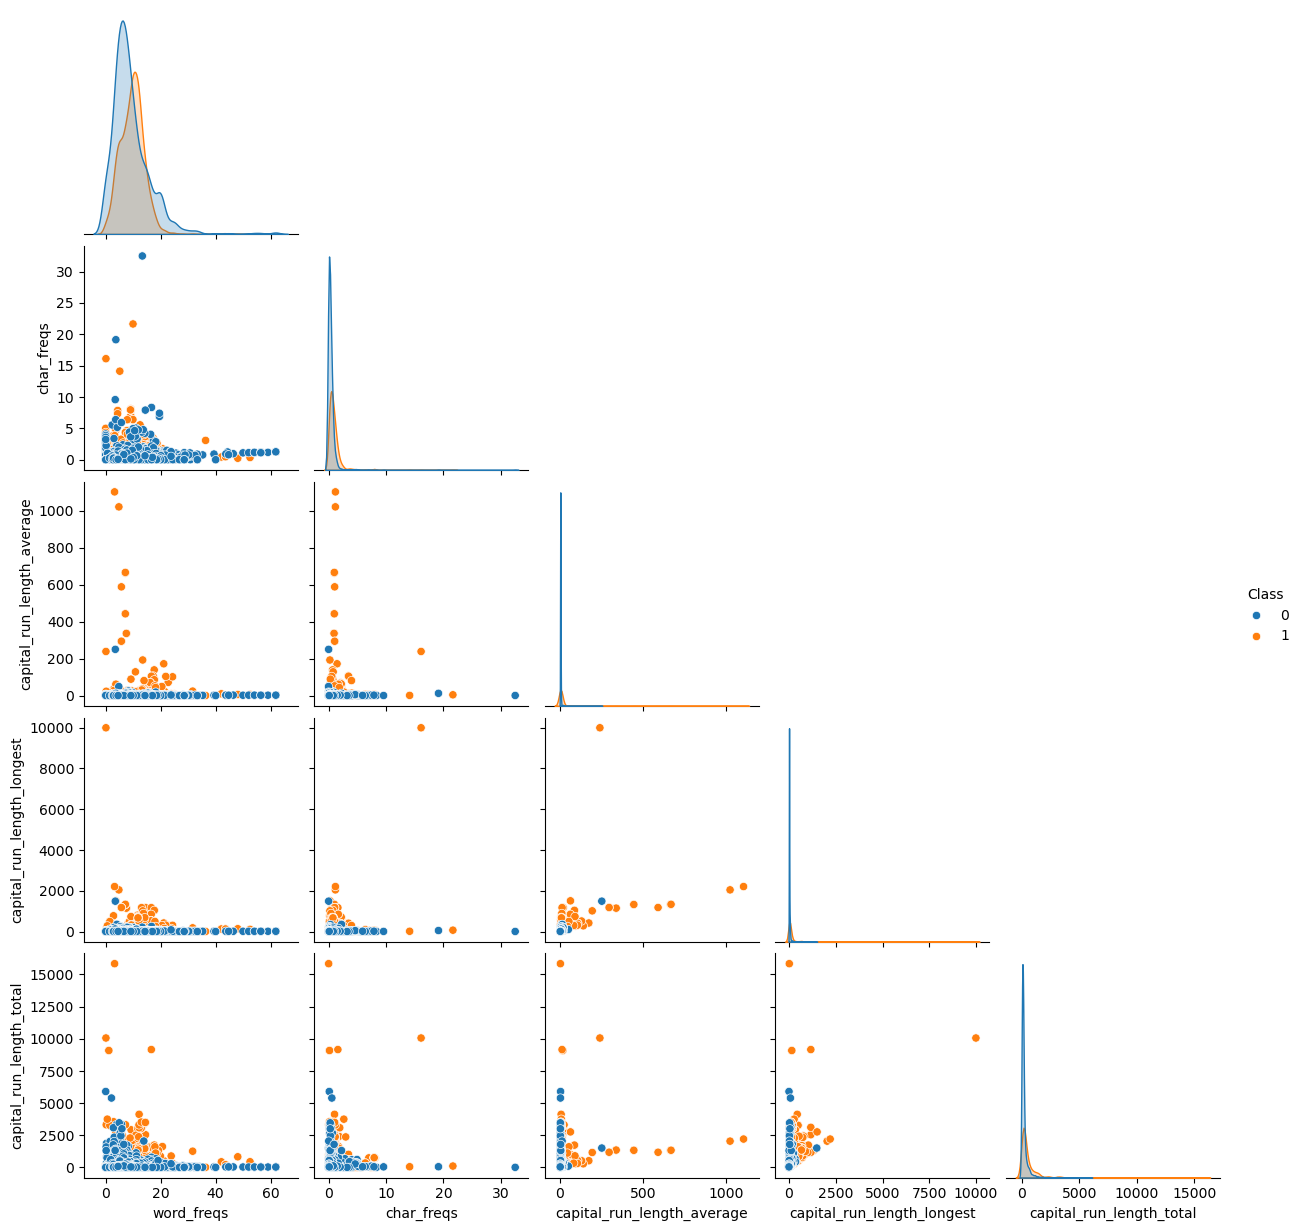

In [15]:
sns.pairplot(df2, hue='Class', corner=True, diag_kind='kde');

The pairplot visualization displays the relationships and distributions of key features in the dataset, separated by email class (non-spam = 0, spam = 1). The diagonal plots show the distribution of each feature, revealing that most features are heavily right-skewed with many low values and a few extreme outliers. The scatterplots below the diagonal illustrate how these features relate to each other and differ between classes. Notably, spam emails (orange points) tend to have higher values in capital letter run length features (capitalrunlengthaverage, capitalrunlengthlongest, capitalrunlengthtotal) and character frequencies (charfreqs) compared to non-spam emails (blue points). This pattern supports the idea that spam messages often use excessive capitalization and special characters to attract attention. Word frequencies (word_freqs) show less clear separation, indicating they may be less discriminative on their own.

# 3. Data Preparation

## Columns Renaming

In [16]:
df = df.rename(columns={
    'char_freq_;': 'char_freq_semicolon',
    'char_freq_(': 'char_freq_open_parenthesis',
    'char_freq_[': 'char_freq_open_bracket',
    'char_freq_!': 'char_freq_exclamation_mark',
    'char_freq_$': 'char_freq_dollar',
    'char_freq_#': 'char_freq_number_sign'
})

In this code, several columns in the dataframe are renamed for clarity and better understanding. The original column names containing special characters are replaced with more descriptive names. For example, 'charfreq;' is changed to 'charfreqsemicolon' and 'charfreq(' is changed to 'charfreqopen_parenthesis'. This renaming helps make the dataset easier to interpret and work with. The changes are applied directly to the dataframe to update its column labels accordingly.

## Define Features and Target

In [17]:
X = df.drop(columns=['Class'])
y = df['Class']

In this code, the features and target variable are defined from the dataframe. The target column labeled 'Class' is separated from the feature columns. All columns except 'Class' are selected as input features and assigned to a variable. The target variable, representing the class labels, is assigned separately. This separation is necessary for training and evaluating machine learning models.

## Train-Test Split

In [18]:
# Perform train-test split with default parameters and stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    stratify=y  # preserve class distribution
)

Train-test split is a common method in machine learning that divides a dataset into two parts: one for training the model and one for testing its performance. This separation helps evaluate how well the model can predict new, unseen data, preventing overly optimistic results caused by testing on the same data used for training. The most commonly used test size is 0.2 or 20%, meaning that 20% of the dataset is reserved for testing while 80% is used for training. This split provides a good balance between having enough data to train the model effectively and enough data to reliably evaluate its performance on unseen samples. In some cases, 25% or 30% test size is also used, especially when the dataset is large enough to still have sufficient training data. The choice depends on the total sample size and the need for robust evaluation, but 20% remains a widely accepted default in machine learning practice (James et al., 2013).

Setting a random state (seed) ensures reproducibility of the train-test split, so that the same split can be generated consistently across different runs. While the default is often None, meaning the split is random and changes each time, using a fixed integer value (e.g., 42) is a common practice to allow others to replicate results exactly. This reproducibility is critical in scientific research and model development for verification and comparison purposes. Thus, many practitioners set a specific random state to ensure consistent experimental conditions (Kuhn & Johnson, 2019).

Stratification is widely used in classification problems to maintain the original class distribution in both training and testing sets. This is especially important when the dataset is imbalanced or when the minority class is small, as it prevents biased or unrepresentative splits that can degrade model performance or evaluation validity. Using the stratify parameter with the target variable ensures that each subset reflects the same proportion of classes as the full dataset, improving generalization and fairness in model assessment (He & Garcia, 2009; Johnson & Khoshgoftaar, 2019).

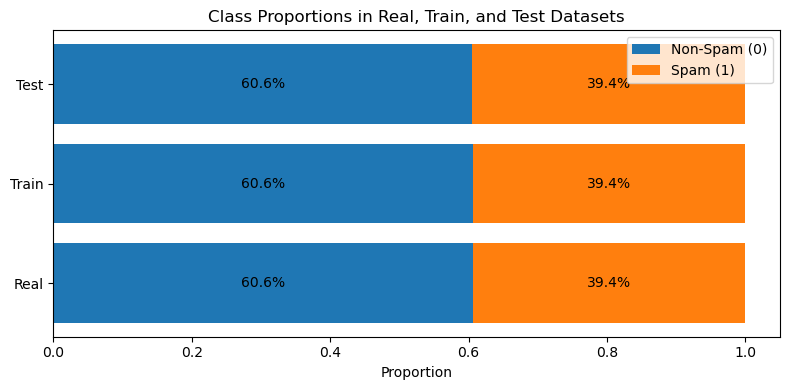

In [19]:
# Calculate class proportions for real, train, and test datasets
def get_class_proportions(labels):
    counts = labels.value_counts(normalize=True).sort_index()
    return counts.values

real_props = get_class_proportions(y)
train_props = get_class_proportions(y_train)
test_props = get_class_proportions(y_test)

# Labels and data - sorted as requested
datasets = ['Real', 'Train', 'Test']  # Sorted order
class_labels = ['Non-Spam (0)', 'Spam (1)']

# Data for stacked bar chart, matching the sorted order
non_spam = [real_props[0], train_props[0], test_props[0]]
spam = [real_props[1], train_props[1], test_props[1]]

# Plot horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(8, 4))

ax.barh(datasets, non_spam, label='Non-Spam (0)')
ax.barh(datasets, spam, left=non_spam, label='Spam (1)')

# Add percentages inside bars
for i in range(len(datasets)):
    ax.text(non_spam[i]/2, i, f"{non_spam[i]*100:.1f}%", va='center', ha='center', color='black', fontsize=10)
    ax.text(non_spam[i] + spam[i]/2, i, f"{spam[i]*100:.1f}%", va='center', ha='center', color='black', fontsize=10)

ax.set_xlabel('Proportion')
ax.set_title('Class Proportions in Real, Train, and Test Datasets')
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()


The stacked bar chart shows the class proportions of Non-Spam (0) and Spam (1) emails in the real dataset, training set, and test set. All three datasets have identical class distributions, with approximately 60.6% of emails classified as Non-Spam and 39.4% as Spam. This indicates that the train-test split was performed with stratification, preserving the original class balance across both training and testing subsets. Maintaining consistent class proportions is crucial to ensure that the model is trained and evaluated on representative samples, which helps prevent bias and improves the reliability of performance metrics. Overall, this result confirms that the data splitting process was done correctly and supports robust model development and evaluation.

# 4. Data Modeling

## Cross Validation

In [20]:
# Define pipelines with verbosity=-1 parameter for LGBMClassifier to suppress info logs
pipelines = {
    'Random Forest': Pipeline([
        ('scaler', RobustScaler()),
        ('classifier', RandomForestClassifier(random_state=42))
    ]),
    'Gradient Boosting': Pipeline([
        ('scaler', RobustScaler()),
        ('classifier', GradientBoostingClassifier(random_state=42))
    ]),
    'AdaBoost': Pipeline([
        ('scaler', RobustScaler()),
        ('classifier', AdaBoostClassifier(random_state=42))
    ]),
    'XGBoost': Pipeline([
        ('scaler', RobustScaler()),
        ('classifier', XGBClassifier(random_state=42))
    ]),
    'LightGBM': Pipeline([
        ('scaler', RobustScaler()),
        ('classifier', LGBMClassifier(random_state=42, verbosity=-1))
    ])
}

# Perform cross-validation using recall as the scoring metric
cv_results = {}
for model_name, pipeline in pipelines.items():
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='recall')
    cv_results[model_name] = [round(c,3) for c in cv_scores]

# Create a DataFrame from the cross-validation results
cv_df = pd.DataFrame({
    'Model': list(cv_results.keys()),
    'Scores': list(cv_results.values())
})

# Add columns for Mean Score and Standard Deviation of the scores with formatting
cv_df['Mean Score'] = cv_df['Scores'].apply(lambda x: round(np.mean(x), 3))
cv_df['Std Score'] = cv_df['Scores'].apply(lambda x: round(np.std(x), 3))

# Sort the DataFrame by Mean Score in descending order
cv_df = cv_df.sort_values(by='Mean Score', ascending=False)

# Display the resulting DataFrame
cv_df


,Model,Scores,Mean Score,Std Score
4,LightGBM,"[0.948, 0.926, 0.938, 0.93, 0.963]",0.941,0.013
3,XGBoost,"[0.948, 0.923, 0.941, 0.919, 0.93]",0.932,0.011
0,Random Forest,"[0.945, 0.908, 0.926, 0.912, 0.919]",0.922,0.013
1,Gradient Boosting,"[0.919, 0.893, 0.923, 0.908, 0.926]",0.914,0.012
2,AdaBoost,"[0.871, 0.871, 0.897, 0.893, 0.901]",0.887,0.013


Cross-validation is widely regarded as a robust technique to evaluate the generalizability of machine learning models. It is performed by partitioning the dataset into multiple subsets, where each subset is used once as a test set while the remaining subsets serve as the training set. This process is repeated multiple times to reduce variability associated with a single train-test split. The model’s performance metrics are averaged over all iterations to provide a more reliable estimate. Cross-validation helps to prevent overfitting and ensures that the model’s predictive ability is fairly assessed (James et al., 2013).

In the provided code, multiple machine learning pipelines are defined, each consisting of a robust scaler followed by a classifier. The classifiers include Random Forest, Gradient Boosting, AdaBoost, XGBoost, and LightGBM. Cross-validation is applied to each pipeline using a 5-fold split, and recall is used as the scoring metric. The recall scores from each fold are collected and rounded for clarity. A summary DataFrame is created to display the individual fold scores, their mean, and standard deviation. The results are sorted by mean recall score to identify the best-performing model.

The cross-validation results indicate that the LightGBM model achieved the highest mean recall score of 0.941, suggesting superior ability to correctly identify spam emails. XGBoost closely follows with a mean recall of 0.932, demonstrating comparable performance. Gradient Boosting, Random Forest, and AdaBoost show progressively lower mean recall scores, indicating relatively less effectiveness. The standard deviations are low across models, implying consistent performance across folds. These findings support the selection of LightGBM as the preferred model for this spam classification task due to its higher recall and stability.

## Hyperparameter Tuning

In [21]:
# Define the LightGBM pipeline (with verbosity=-1 to suppress info logs)
pipeline_lgbm = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', LGBMClassifier(random_state=42, verbosity=-1))
])

param_distributions = {
    'classifier__num_leaves': [31, 50, 70, 90, 120],                 # Tree leaves, controls model complexity
    'classifier__max_depth': [-1, 10, 15, 20, 25],                   # Max depth, -1 means no limit
    'classifier__learning_rate': [0.1, 0.05, 0.01, 0.005],           # Small learning rates for stable training
    'classifier__n_estimators': [100, 200, 300, 400, 500],           # Number of trees, more for better accuracy
    'classifier__min_child_samples': [10, 20, 30, 40, 50],           # Minimum data per leaf for regularization
    'classifier__subsample': [0.6, 0.7, 0.8, 0.9, 1.0],              # Fraction of data for bagging to prevent overfitting
    'classifier__colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],       # Fraction of features per tree, regularization
    'classifier__reg_alpha': [0, 0.1, 0.5, 1.0],                     # L1 regularization
    'classifier__reg_lambda': [0, 0.1, 0.5, 1.0]                     # L2 regularization
}

# Initialize RandomizedSearchCV with recall scoring and 5-fold CV
random_search = RandomizedSearchCV(
    estimator=pipeline_lgbm,
    param_distributions=param_distributions,  # corrected parameter name
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=1,
    n_iter=20,  # for example, 20 iterations; can be adjusted
    random_state=42
)

# Run parameter search on training data
random_search.fit(X_train, y_train)

# Display best parameters and best score
print("Best parameters found:")
print(random_search.best_params_)
print(f"Best recall score: {random_search.best_score_:.3f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found:
{'classifier__subsample': 0.8, 'classifier__reg_lambda': 0.1, 'classifier__reg_alpha': 0, 'classifier__num_leaves': 70, 'classifier__n_estimators': 100, 'classifier__min_child_samples': 30, 'classifier__max_depth': 25, 'classifier__learning_rate': 0.1, 'classifier__colsample_bytree': 0.9}
Best recall score: 0.943


Hyperparameter tuning is a critical step in optimizing machine learning models to improve their predictive performance. It involves systematically searching through a predefined set of parameters to identify the best combination that maximizes a chosen evaluation metric. Randomized search is a popular technique that samples a fixed number of parameter settings from specified distributions, providing a balance between computational efficiency and thoroughness. Cross-validation is typically integrated into this process to ensure robust evaluation across different data splits. This approach helps to prevent overfitting and enhances the model’s generalizability (James et al., 2013).

The code defines a machine learning pipeline consisting of a robust scaler and a LightGBM classifier with suppressed verbosity to reduce log output. A parameter grid is specified, including hyperparameters such as number of leaves, maximum tree depth, learning rate, number of estimators, and regularization terms. A randomized search with 20 iterations and 5-fold cross-validation is initialized, using recall as the scoring metric. The search is executed on the training data to identify the best parameter combination. Finally, the best parameters and the corresponding highest recall score are printed for review.

The hyperparameter tuning results reveal that the optimal LightGBM model uses a subsample rate of 0.8 and maximum depth of 25, among other settings. Regularization parameters reg_alpha and reg_lambda are set to 0 and 0.1 respectively, indicating light regularization to prevent overfitting. The best recall score achieved is 0.943, slightly lower than the previous best but still demonstrating strong performance. These findings suggest that the tuning process successfully identified a well-balanced model configuration, emphasizing the importance of hyperparameter optimization in enhancing spam detection effectiveness.

# 5. Evaluation

## Before Tuning

Recall Score - Before Tuning:
0.945


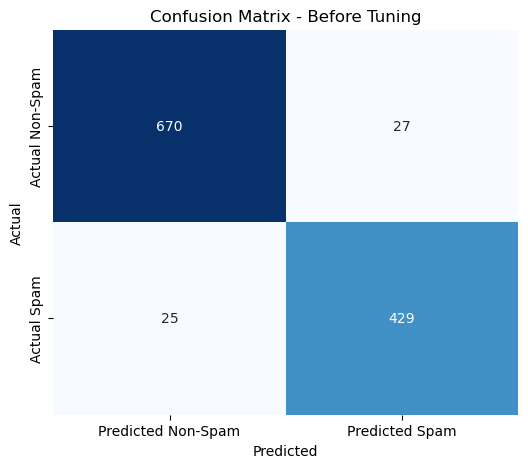

In [22]:
# Fit the default LightGBM model from the pipelines
model_default = pipelines['LightGBM']
model_default.fit(X_train, y_train)

# Predict using the default model
y_pred_default = model_default.predict(X_test)

# Calculate recall score
recall_before = recall_score(y_test, y_pred_default)
print("Recall Score - Before Tuning:")
print(f"{recall_before:.3f}")

# Calculate confusion matrix
cm_before = confusion_matrix(y_test, y_pred_default)

# Plot heatmap of the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_before, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Non-Spam', 'Predicted Spam'],
            yticklabels=['Actual Non-Spam', 'Actual Spam'])
plt.title('Confusion Matrix - Before Tuning')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

The default LightGBM model from the predefined pipelines was fitted using the training data. Predictions were subsequently generated on the test dataset to assess model performance. The recall score was computed to evaluate the model’s capability to correctly identify spam emails. A confusion matrix was created to summarize the classification outcomes. Lastly, the confusion matrix was visualized as a heatmap for clearer interpretation.

The recall score before tuning was recorded as 0.945. This indicates that 94.5% of the actual spam emails were accurately detected by the model. Recall is an important metric in spam detection because it measures the proportion of true positives relative to all actual positive cases. A high recall score reduces the likelihood of false negatives, which are costly in this context. Thus, the model’s ability to minimize missed spam emails is effectively demonstrated by this score.

The confusion matrix reveals that 670 non-spam emails were correctly classified as non-spam, while 27 were mistakenly predicted as spam. Among spam emails, 429 were correctly identified, and 25 were misclassified as non-spam. The false negatives count (25) is relatively low, supporting the high recall score. Overall, the confusion matrix confirms that the model performs well in distinguishing spam from non-spam emails, with few classification errors.

## After Tuning

Recall Score - After Tuning:
0.941


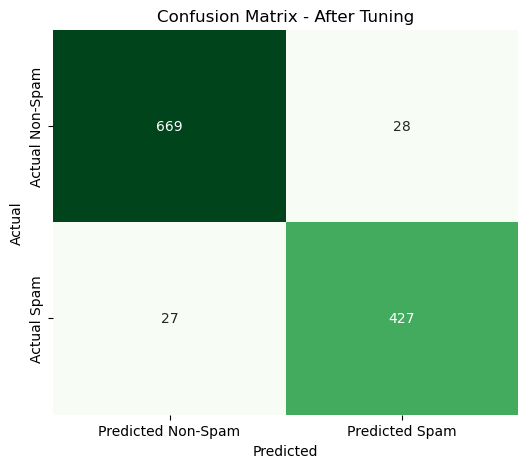

In [23]:
# Predict using the tuned model
best_model = random_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

# Calculate recall score with formatting to three decimal places
recall_after = recall_score(y_test, y_pred_tuned)
print("Recall Score - After Tuning:")
print(f"{recall_after:.3f}")

# Calculate confusion matrix
cm_after = confusion_matrix(y_test, y_pred_tuned)

# Plot heatmap of the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_after, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Predicted Non-Spam', 'Predicted Spam'],
            yticklabels=['Actual Non-Spam', 'Actual Spam'])
plt.title('Confusion Matrix - After Tuning')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

The tuned LightGBM model, obtained from the randomized search, was used to predict the labels on the test dataset. The recall score was then calculated to evaluate the model’s ability to correctly identify spam emails after tuning. A confusion matrix was computed to summarize the classification performance. The confusion matrix was visualized as a heatmap for better clarity. This process provided a clear assessment of the model’s effectiveness post-optimization.

The recall score after tuning was measured at 0.941, slightly lower than the 0.945 recall score achieved by the default model before tuning. This indicates that 94.1% of the actual spam emails were correctly detected by the tuned model, compared to 94.5% by the default model. Recall remains a critical metric in this scenario because it reflects the proportion of true positives among all actual positive cases. The minor decrease in recall suggests a slight trade-off, possibly due to adjustments in model complexity or regularization. Nonetheless, the tuned model maintains strong performance in minimizing false negatives.

The confusion matrix shows that 669 non-spam emails were correctly classified, while 28 were misclassified as spam by the tuned model. For spam emails, 427 were correctly identified, and 27 were incorrectly predicted as non-spam. Compared to the default model, which correctly classified 670 non-spam and 429 spam emails with 25 false negatives, the tuned model shows a slight increase in misclassifications. The number of false negatives (27) is marginally higher than before tuning, consistent with the recall score. Overall, both models perform well, with the default model showing a slightly better recall, while the tuned model may offer other benefits such as better regularization or generalization.

## SHAP Model Interpretation

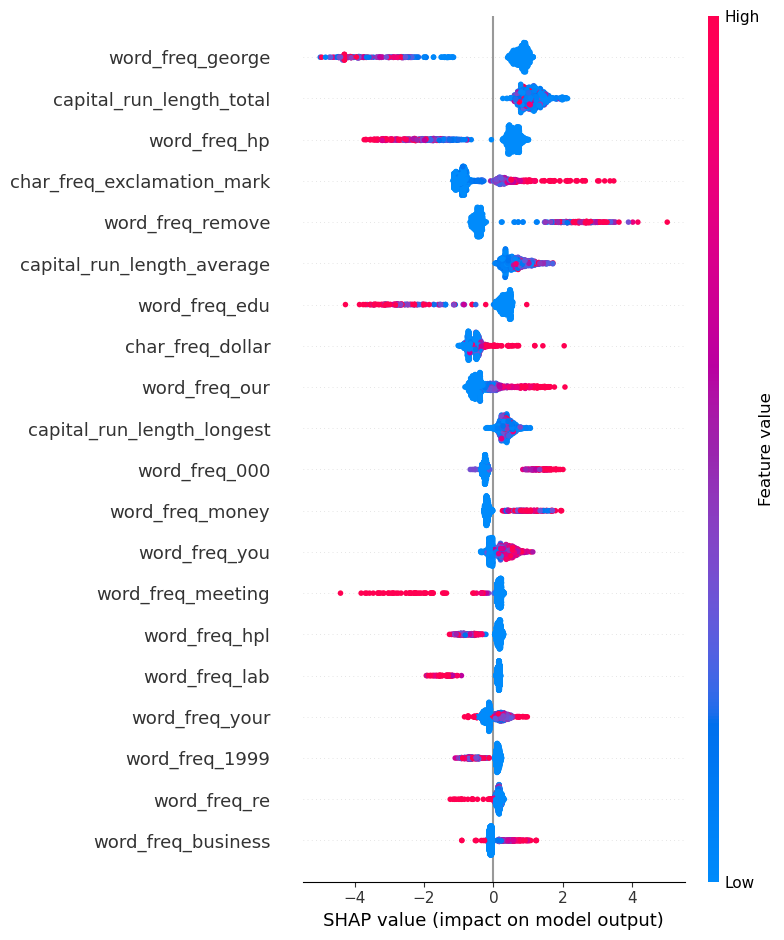

In [24]:
# Extract the LightGBM model from the pipeline (classifier only)
model = model_default.named_steps['classifier']

# Use the test data (X_test) in numpy array or DataFrame format
X_test_data = X_test  # ensure this is a DataFrame or feature array

# Create a SHAP explainer for LightGBM (TreeExplainer is faster for tree-based models)
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the test data
shap_values = explainer.shap_values(X_test_data)

# Plot SHAP summary (global feature importance with direction of effect)
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_data, plot_type="dot", show=True)

The LightGBM classifier is extracted from the trained pipeline to isolate the model for interpretation. The test dataset is prepared in a suitable format (DataFrame or array) for analysis. A SHAP (SHapley Additive exPlanations) explainer is created using the TreeExplainer method, which is optimized for tree-based models like LightGBM. SHAP values, representing the contribution of each feature to individual predictions, are then calculated for the test data. Finally, a SHAP summary plot is generated to visualize the global importance of features and their directional impact on the model’s output.

The plot ranks features by their overall importance in predicting whether an email is spam. Each dot represents an individual email, colored by the feature value from low (blue) to high (red). Features on the left with negative SHAP values reduce the likelihood of an email being classified as spam, while those on the right with positive SHAP values increase it. For example, a high value of wordfreqgeorge (red dots on left side) strongly decreases spam prediction, indicating it is characteristic of non-spam emails. Conversely, features like charfreqexclamationmark and wordfreqremove with high values push predictions toward spam. Capital letter run length features (capitalrunlengthtotal, capitalrunlengthaverage, capitalrunlengthlongest) also have a strong positive impact, consistent with spam emails often containing excessive capitalization. This visualization helps identify which words and text patterns most influence the model’s decisions and in what direction.

The SHAP analysis reveals that certain words (e.g., “george,” “hp”) and lower capitalization tend to indicate non-spam emails, while frequent exclamation marks, words like “remove,” and longer capital letter sequences strongly contribute to spam classification. The model’s behavior aligns with domain knowledge about spam characteristics, providing interpretable insights that can aid in understanding and trusting the classifier’s predictions.

In [25]:
# Initialize SHAP JavaScript visualization in the notebook or environment
shap.initjs()

# Create an interactive SHAP force plot for the first test instance
# This plot shows how each feature contributes to pushing the prediction
# from the base value to the model output for that specific instance
shap.force_plot(explainer.expected_value, shap_values[0], X_test_data.iloc[0])

The SHAP JavaScript visualization is initialized to enable interactive plots within the notebook or environment. An interactive SHAP force plot is then created for the first test instance, which visually explains how each feature contributes to pushing the model’s prediction away from the base value (average prediction) toward the final output for that specific email. This force plot shows positive and negative contributions of features as forces pushing the prediction higher or lower. The visualization helps to understand the decision-making process of the model on an individual prediction level.

In the force plot, features pushing the prediction toward spam classification are shown in red on the right, while those pushing against spam classification (toward non-spam) are shown in blue on the left. The base value represents the average model output over the training data, and the final output is the model’s prediction for this specific email. Each feature’s contribution is represented by a bar or arrow, indicating the magnitude and direction of its impact. For example, if a feature like wordfreqcredit has a strong positive effect, it pushes the prediction toward spam, whereas a feature like wordfreqgeorge with a negative effect pulls it toward non-spam.

The SHAP force plot provides an intuitive and detailed explanation of how individual features combine to produce the model’s prediction for a single email. It allows users to see which features were most influential in classifying the email as spam or not, enhancing transparency and trust in the model. This level of interpretability is especially valuable in sensitive applications like spam detection, where understanding specific decisions can guide further improvements and user confidence.

## Final Verdict

In [26]:
# Cost per false negative case in USD
cost_per_fn = 175

# Total number of spam emails (class 1) in the test dataset
# Assuming y_test is the true labels for the test set
num_spam_total = y_test.sum()

# Financial loss before using any machine learning model
# Assuming all spam emails are missed (false negatives = total spam)
loss_before_ml = num_spam_total * cost_per_fn

# Confusion matrix before tuning (2x2 numpy array)
# Format: [[TN, FP],
#          [FN, TP]]
# cm_before should be obtained from model evaluation before tuning
fn_before = cm_before[1, 0]  # False Negatives count

# Financial loss after using the model before tuning
loss_after_ml_before_tuning = fn_before * cost_per_fn

print(f"Financial loss before using machine learning: ${loss_before_ml:,}")
print(f"Financial loss after using model before tuning: ${loss_after_ml_before_tuning:,}")
print(f"Difference in Financial Loss: ${loss_before_ml - loss_after_ml_before_tuning:,}")
print(f"Percentage difference in Financial Loss: {((loss_before_ml - loss_after_ml_before_tuning) / loss_before_ml) * 100:.2f}%")

Financial loss before using machine learning: $79,450
Financial loss after using model before tuning: $4,375
Difference in Financial Loss: $75,075
Percentage difference in Financial Loss: 94.49%


The cost per false negative case was set at 175 USD, representing the estimated financial loss incurred when a spam email is not detected. The total number of spam emails in the test dataset was calculated by summing the true positive labels. The financial loss before applying any machine learning model was estimated by assuming all spam emails would be missed, resulting in maximum loss. The confusion matrix obtained before tuning was used to extract the false negative count, which represents spam emails incorrectly classified as non-spam. The financial loss after using the model before tuning was then calculated by multiplying the false negatives by the cost per case.

The financial loss before using machine learning was computed to be $79,450, assuming every spam email caused a loss. After applying the model before tuning, the financial loss dropped significantly to $4,375, reflecting the reduced number of false negatives. The difference in financial loss was $75,075, indicating substantial cost savings. This difference corresponds to a 94.49% reduction in financial loss, demonstrating the model’s effectiveness in mitigating risk. These calculations highlight the economic value of deploying a spam detection model.

Overall, the analysis quantifies the monetary impact of false negatives and shows how the machine learning model dramatically reduces potential losses. By lowering the number of missed spam emails, the model protects the organization from costly breaches or frauds. The large percentage reduction in financial loss underscores the importance of accurate spam classification. This cost-based evaluation complements traditional performance metrics, providing a practical perspective on model benefits. It reinforces the business case for implementing and continuously improving spam detection systems.

# 6. Deployment

In [27]:
# Save the best model to a file
joblib_file = "best_lgbm_model.joblib"
joblib.dump(random_search.best_estimator_, joblib_file)
print(f"Model saved to {joblib_file}")

Model saved to best_lgbm_model.joblib


The best LightGBM model, obtained from the hyperparameter tuning process, was saved to a file named "bestlgbmmodel.joblib" using the joblib library. This serialization allows the trained model to be stored persistently for future use without retraining. Saving the model facilitates easy deployment, sharing, and reproducibility of results. A confirmation message was printed to indicate that

# References

Almeida, T. A., Almeida, J. M., & Yamakami, A. (2011). Spam filtering: How the dimensionality reduction affects the accuracy of classifiers. *Information Sciences*, 181(6), 1138-1152. https://jisajournal.springeropen.com/articles/10.1007/s13174-010-0014-7

Belcic, I. (2024, October 15). *What is classification in machine learning?* IBM Think. https://www.ibm.com/think/topics/classification-machine-learning

Google Developers. (2025). Thresholds and the confusion matrix. Machine Learning Crash Course. https://developers.google.com/machine-learning/crash-course/classification/thresholding

Guzella, T. S., & Caminhas, W. M. (2009). A review of machine learning approaches to spam filtering. Expert Systems with Applications, 36(7), 10206-10222. https://www.sciencedirect.com/science/article/abs/pii/S095741740900181X

Hauke, J., & Kossowski, T. (2011). Comparison of values of Pearson’s and Spearman’s correlation coefficients on the same sets of data. *Quaestiones Geographicae*, 30(2), 87-93. https://doi.org/10.2478/v10117-011-0021-1

He, H., & Garcia, E. A. (2009). Learning from imbalanced data.* IEEE Transactions on Knowledge and Data Engineering*, 21(9), 1263-1284. https://doi.org/10.1109/TKDE.2008.239

Hopkins, M., Reeber, E., Forman, G., & Suermondt, J. (1999). Spambase dataset. UCI Machine Learning Repository. https://archive.ics.uci.edu/dataset/94/spambase

James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). *An Introduction to Statistical Learning: with Applications in R (1st ed.)*. Springer. https://doi.org/10.1007/978-1-4614-7138-7

James, G., Witten, D., Hastie, T., & Tibshirani, R. (2017). *An introduction to statistical learning: with applications in R (2nd ed.)*. Springer.

Johnson, J. M., & Khoshgoftaar, T. M. (2019). Survey on deep learning with class imbalance. *Journal of Big Data*, 6(1), 27. https://doi.org/10.1186/s40537-019-0192-5

Kirvan, P., Awati, R., & Teravainen, T. (2024). What is email spam and how to fight it? TechTarget. https://www.techtarget.com/searchsecurity/definition/spam

Kuhn, M., & Johnson, K. (2019). *Feature Engineering and Selection: A Practical Approach for Predictive Models*. CRC Press.

Metsis, V., Androutsopoulos, I., & Paliouras, G. (2006). Spam filtering with naive Bayes-which naive Bayes? *CEAS 2006 - Third Conference on Email and Anti-Spam.*

Ponemon Institute & IBM Security. (2020). *Cost of a Data Breach Report 2020*. IBM Corporation.

Sennewald, C. A., & Baillie, C. (2016). Computers and effective security management. *Effective security management* (6th ed., pp. 235–249). Elsevier.